In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Normalización de x,y

def normalizacion(x,y):

  maxX = 1920
  minX = 0

  normalizedX=(x-minX)/(maxX-minX)

  maxY = 1080
  minY = 0

  normalizedX=(x-minX)/(maxX-minX)

  normalizedY=(y-minY)/(maxY-minY)

  return normalizedX, normalizedY

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def slice(df, ruta_slice):

  # recortar solamente las fijaciones predichas correctamente (dentro de los limites de la pantalla)
  sliced = df.loc[(df["Ruta"] == ruta_slice) & ((df["X"] <= 1920) & (df["X"] > 0) & (df["Y"] < 1080) & (df["Y"] > 0)),  
                  
                  ["X","Y","Timestamp"]]

  x = sliced["X"]
  y = sliced["Y"]*-1

  #print(y)

  return x, y

In [ ]:
def concadenar_data(x,y,df,ruta_slice):
  
  sliced = df.loc[(df["Ruta"] == ruta_slice) & ((df["X"] <= 1920) & (df["X"] > 0) & (df["Y"] < 1080) & (df["Y"] > 0)),  

                ["X","Y","Timestamp"]]

  x = x.append(sliced["X"])
  y = y.append(sliced["Y"]*-1)  

  return x, y

In [ ]:
import pandas as pd
import os
import csv

def readFile(data):
  df = pd.read_csv(data, usecols=col_list) 
  return df

dir = '/content/gdrive/MyDrive/Universidad/Tesis/Proyecto/resultados'
os.chdir(dir) # change colab current directory

# leyendo y extrayendo columnas del csv

col_list = ["X", "Y", "Ruta", "Timestamp"]

first_file = True

ruta_slice = "http://localhost:4200/marketplace/view-list-products"

for file in os.listdir(dir):
  if file.endswith(".csv"):

    df = readFile(file)

    if(first_file): # concadenando eye data usando como condicion la ruta_slice
      
      first_file = False
      x, y = slice(df, ruta_slice)
      print(y, file)

    else:
      x, y = concadenar_data(x, y, df, ruta_slice)
      print(y, file)




23792   -553
23793   -853
23794   -460
23796   -335
23798   -370
        ... 
24165   -937
24166   -409
24167   -409
24175   -487
24176   -301
Name: Y, Length: 151, dtype: int64 my_data pato 79% completo.csv
23792   -553
23793   -853
23794   -460
23796   -335
23798   -370
        ... 
24165   -937
24166   -409
24167   -409
24175   -487
24176   -301
Name: Y, Length: 151, dtype: int64 my_data marce 69%.csv
23792   -553
23793   -853
23794   -460
23796   -335
23798   -370
        ... 
24165   -937
24166   -409
24167   -409
24175   -487
24176   -301
Name: Y, Length: 151, dtype: int64 my_data richard 53%.csv
23792   -553
23793   -853
23794   -460
23796   -335
23798   -370
        ... 
21747    -47
21748   -366
21752   -224
21754   -950
21755   -736
Name: Y, Length: 249, dtype: int64 my_data fran 69% completo.csv
23792   -553
23793   -853
23794   -460
23796   -335
23798   -370
        ... 
15912   -733
15914   -644
15917   -836
15939   -185
15941    -88
Name: Y, Length: 293, dtype: int64 my_d

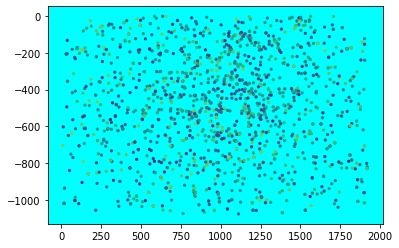

In [ ]:
# crear grafico

fig, ax = plt.subplots()

# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

ax.set_facecolor('cyan')

ax.scatter(x, y, s=5, c=colors, vmin=0, vmax=100)


Funciona ahora quiero cambiar el formato para que sea heatmap.

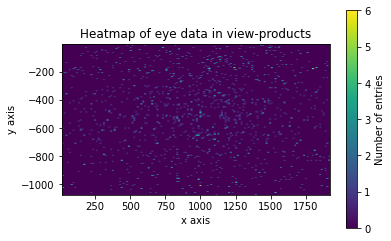

In [ ]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(150))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')

# Add title and labels to plot.
plt.title('Heatmap of eye data in view-products')
plt.xlabel('x axis')
plt.ylabel('y axis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')

plt.show()